In [1]:
import xarray as xr, xarray_tools as xrt
import matplotlib.pyplot as plt
import aera

from notebook_metadata import create_savefig

savefig = create_savefig(dir='/g/data/p66/mrd599/temp', nb='AERA_setup.ipynb')
%matplotlib inline

In [2]:
df = aera.get_base_df()
print(df)

Use the following non-CO2 RF file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/nonco2_rf_ssp126_v1.dat
Use the following non-CO2 emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/nonco2_emis_ssp126_v3.dat
Use the following land use emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/lu_emis_ssp126_bern3d_adj_GCB2020_v1.dat
Use the following historical fossil fuel CO2 emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/co2_ff_GCP_plus_NDC_v1.dat
Use the following historical N2O concentration file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/n2o_conc_ssp126_v1.dat
      rf_non_co2  non_co2_emission  lu_emission  ff_emission  temp  co2_conc  \
year                                                                           
1751         NaN               NaN          NaN        0.003   NaN       NaN   
1752         NaN               NaN          NaN        0.003   NaN       NaN  

Text(0.5, 0, 'Year')

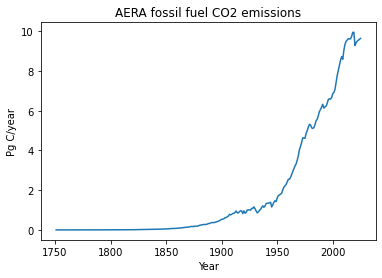

In [3]:
fig, axes = plt.subplots()
# df['ff_emission'].iloc[250:].plot()
df['ff_emission'].plot()
axes.set_title('AERA fossil fuel CO2 emissions')
axes.set_ylabel('Pg C/year')
axes.set_xlabel('Year')

Text(0.5, 0, 'Year')

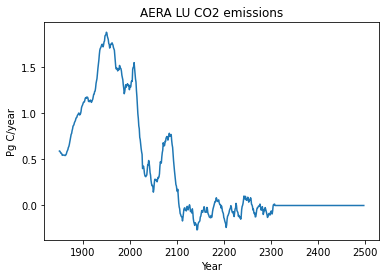

In [6]:
fig, axes = plt.subplots()
df['lu_emission'].plot()
axes.set_title('AERA LU CO2 emissions')
axes.set_ylabel('Pg C/year')
axes.set_xlabel('Year')

Text(0.5, 0, 'Year')

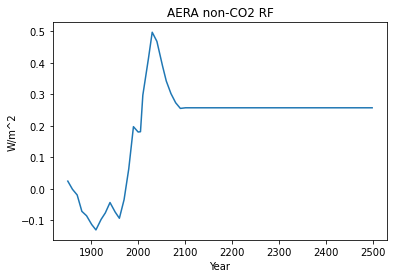

In [4]:
fig, axes = plt.subplots()
df['rf_non_co2'].plot()
axes.set_title('AERA non-CO2 RF')
axes.set_ylabel('W/m^2')
axes.set_xlabel('Year')

In [4]:
# Converted from /g/data1a/p66/txz599/data/ancil/CMIP6/CO2_fluxes_ESM_1750_2014.anc 
d = xr.load_dataset('/scratch/p66/mrd599/CO2_fluxes_ESM_1750_2014.nc')
co2 = d.fld_s00i251
areacella = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/fx/areacella/gn/latest/areacella_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc').areacella

In [5]:
def annual_sum_360(ds):
    # Assuming a 360 day calendar
    ann_mean = ds.groupby('time.year').sum(dim='time')
    return ann_mean

In [6]:
co2_ann = xrt.annual_mean(co2)
co2_ann_360 = annual_sum_360(co2)
area_tot = areacella.sum()
# This is now in kg/m^2/s
co2_g = xrt.global_mean(co2_ann, areacella)
co2_g_360 = xrt.global_mean(co2_ann_360, areacella)


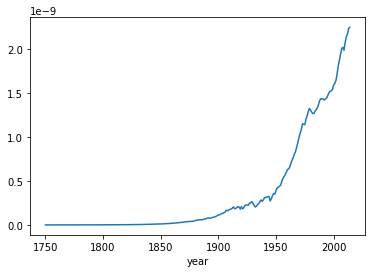

In [7]:
co2_g.plot()

In [ ]:
# kg / yr
co2_g = co2_g * area_tot  * 86400 * 365
# Pg / year = 1e12 kg/year
co2_g *= 1e-12
co2_g_360 = co2_g_360 * area_tot * 86400 * 30 * 1e-12
# Pg C / year
C_g = co2_g * 12 / 44
C_g_360 = co2_g_360 * 12 / 44

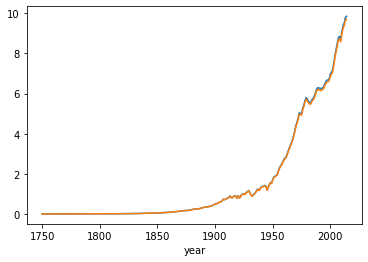

In [19]:
C_g.plot()
C_g_360.plot()

(2000.0, 2025.0)


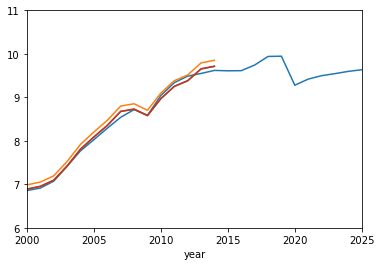

In [31]:
fig, axes = plt.subplots()
df['ff_emission'].plot()
C_g.plot()
C_g_360.plot()
(C_g * 360 / 365).plot()
# axes.set_xlim(1850,2026)
axes.set_xlim(2000,2025)
axes.set_ylim(6,11)
print(axes.get_xlim())

In [27]:
print(df['ff_emission'][2014])
print(C_g_360[-1])
print(C_g[-1])

9.619
<xarray.DataArray ()>
array(9.71032241)
Coordinates:
    year     int64 2014
<xarray.DataArray ()>
array(9.85178046)
Coordinates:
    year     int64 2014


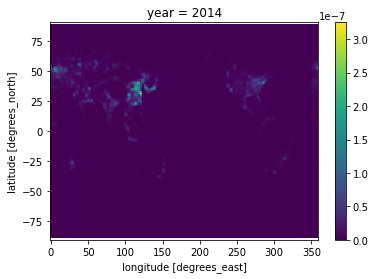

In [23]:
co2_ann[-1].plot()

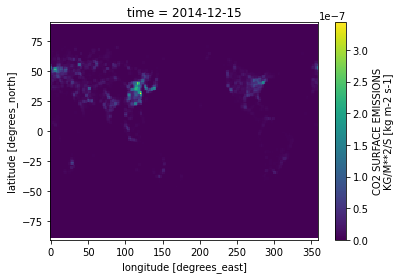

In [14]:
co2[-1].plot()